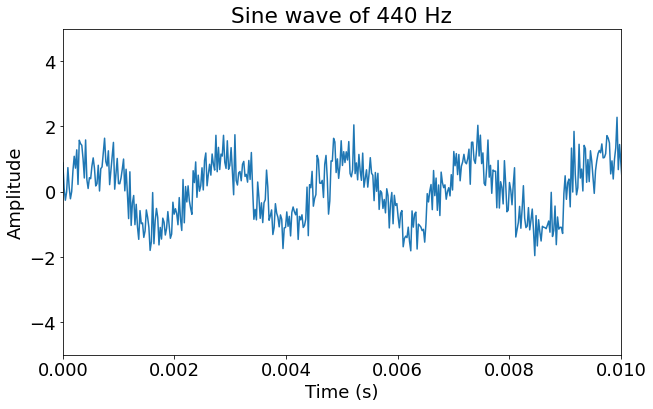

In [ ]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})


dt = 1/44100
t = np.arange(0, 2, dt)
sig = np.sin(2*np.pi*440*t)  #composite signal
signal_clean = sig #copy for later comparison
sig = sig + 0.5 * np.random.randn(len(t))
minsignal, maxsignal = sig.min(), sig.max()

plt.plot(t, sig)
plt.title('Sine wave of 440 Hz')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.ylim(-5, 5)
plt.xlim(0, 0.01)
plt.show()

Audio(data= sig , rate=44100)

In [ ]:
def visualization(t, signal ,xlim, ylim, zoom):
    ## Visualization
    #t = np.arange(0, 2, dt)
    n = len(t)
    freq = (1/(dt*n))*np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype = int)
    fig, ax = plt.subplots(2,1,figsize=(15,15))
    minsignal, maxsignal = sig.min(), sig.max()

    ax[0].plot(t, signal, color='r', lw=1, label='Signal')
    ax[0].set_ylim([minsignal, maxsignal])
    ax[0].set_xlabel('t axis')
    ax[0].set_ylabel('Vals')
    if zoom:
      ax[0].set_ylim(-2,2)
      ax[0].set_xlim(0, 0.01)
    ax[0].set_title("signal waveform")
    ax[0].legend()

    fft = np.fft.fft(signal, n)
    psd = fft * np.conj(fft)/n

    ax[1].plot(freq[L],psd[L],color= "c")
    ax[1].set_xlim(0,xlim)
    ax[1].set_ylim(0,ylim)
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_ylabel("PSD")


    plt.subplots_adjust(hspace=0.5)
    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


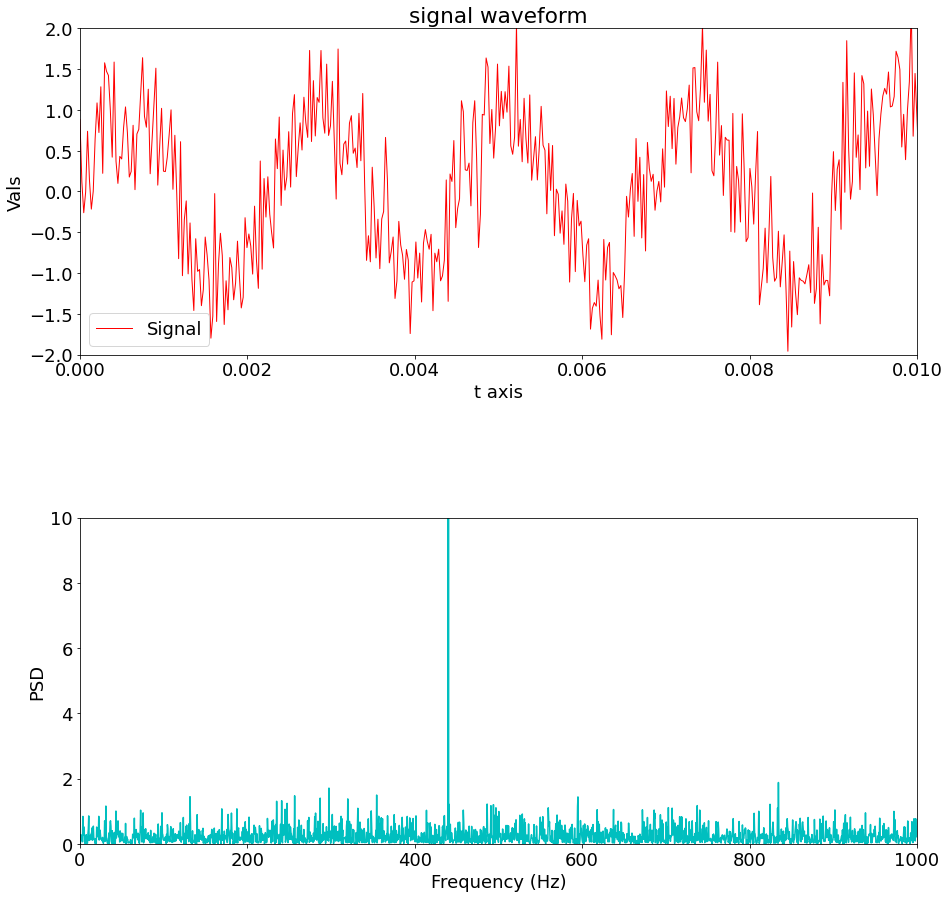

In [ ]:
dt = 1/44100
t = np.arange(0, 2, dt)
visualization(t, sig ,1000, 10, 1)

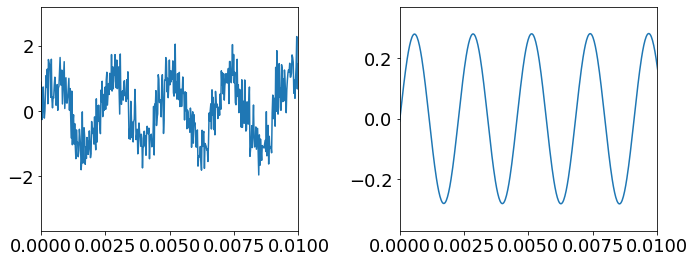

In [ ]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# as fraction of Nyquist frequency, half the sample rate
# 440/(44100/2) = 0.19955
b, a = scipy.signal.butter(1, [0.01995,0.01996], 'band')
filtered = scipy.signal.filtfilt(b, a, sig)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, sig)
plt.xlim(0, 0.01)
plt.margins(0, .05)

plt.subplot(122)
plt.plot(t, filtered)
plt.xlim(0, 0.01)
plt.margins(0, .05)

plt.tight_layout()
plt.show()

Audio(data= filtered , rate=44100)

In [ ]:
#try the order of three
b, a = scipy.signal.butter(3, [0.01995,0.01996], 'band')
filtered2 = scipy.signal.filtfilt(b, a, sig)
Audio(data= filtered2 , rate=44100)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


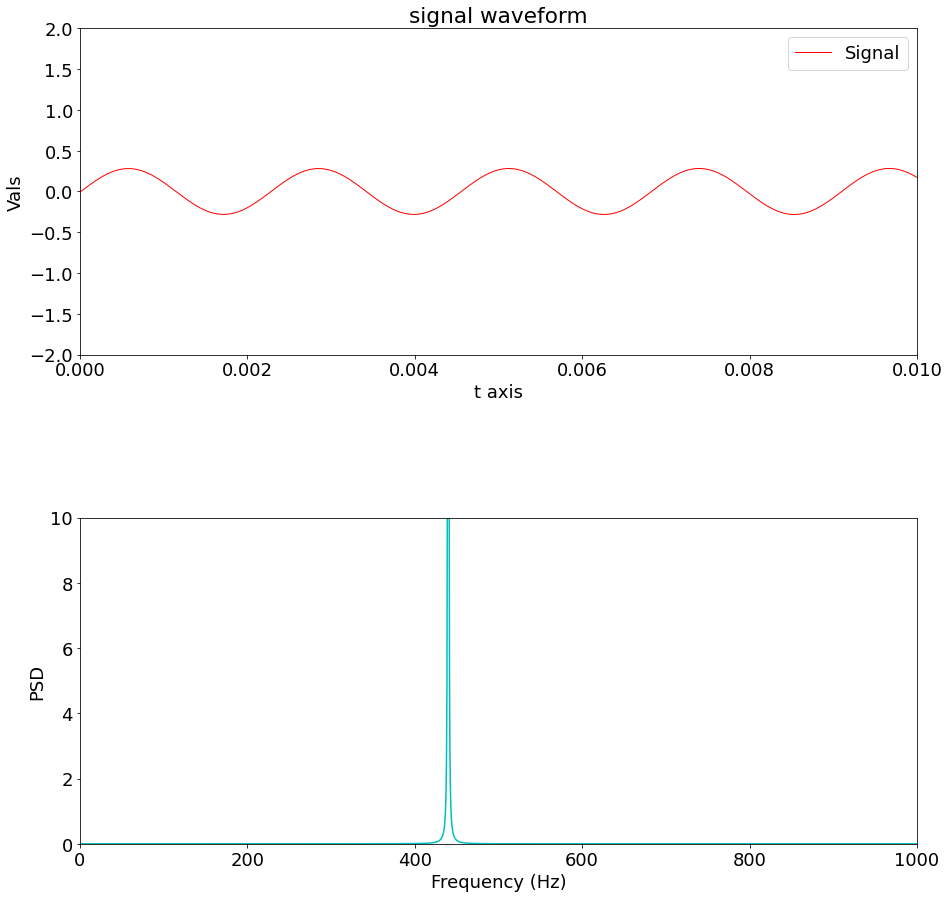

In [ ]:
dt = 1/44100
t = np.arange(0, 2, dt)
visualization(t, filtered ,1000, 10, 1)

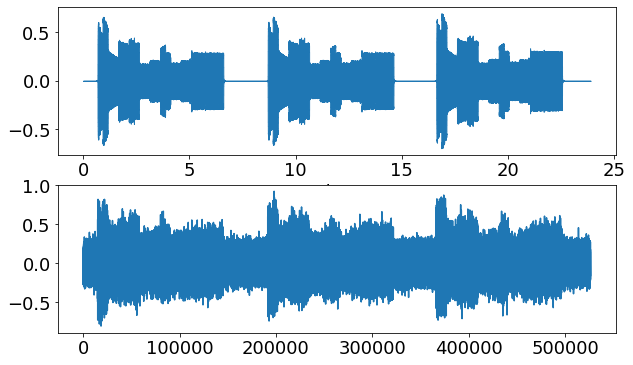

In [ ]:
x, sr = librosa.load('/content/NOKIA RINGTONE [1994].wav', sr = 44100)

fig, axes = plt.subplots(2,1)

librosa.display.waveshow(x, ax=axes[0])

dt = 1/44100
t = np.arange(0, 11.9379591837, dt)
noise_signal = np.random.randn(len(t)-1)
noisy_nokia = x + 0.1 * noise_signal


axes[1].plot(noisy_nokia)
Audio(data = noisy_nokia, rate = 44100)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


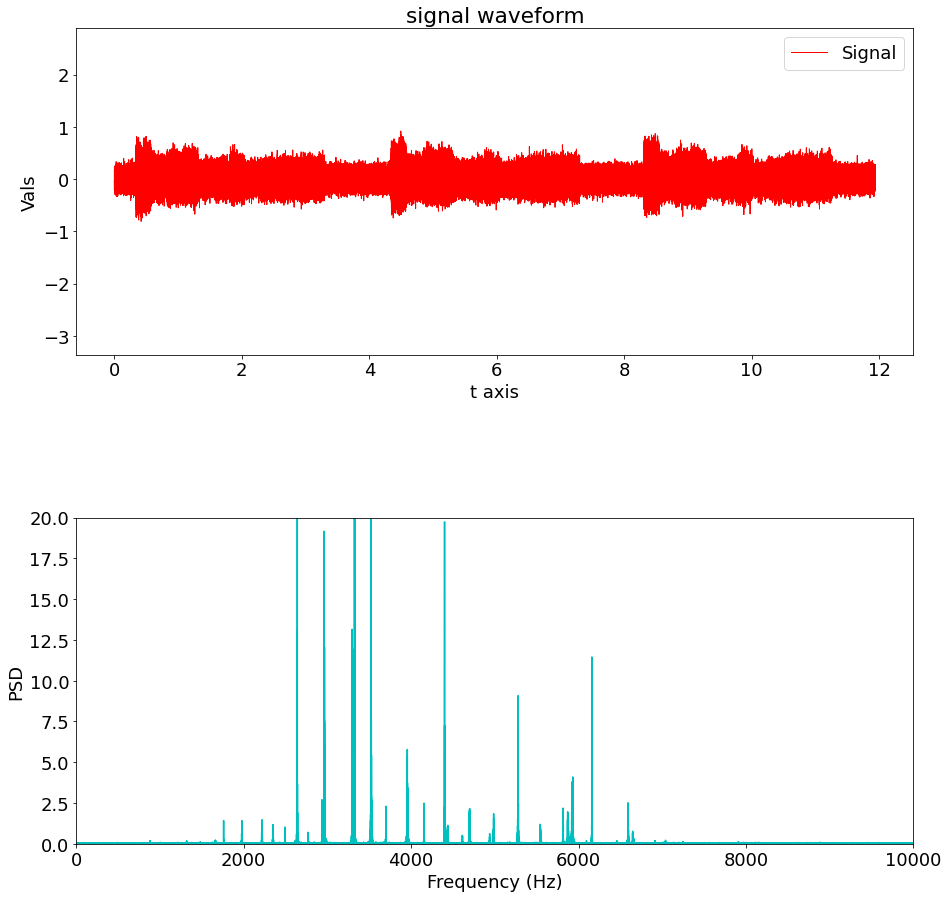

In [ ]:
t = np.arange(0, 11.9379591836, dt)
visualization( t, noisy_nokia ,10000 , 20, 0)

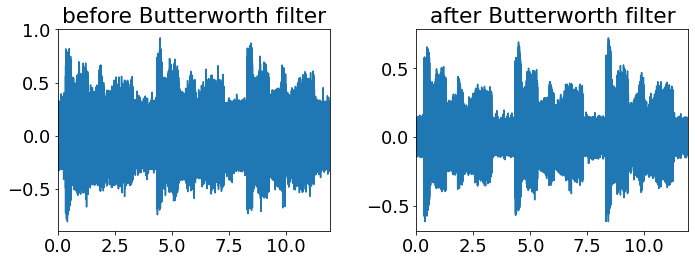

In [ ]:
b, a = scipy.signal.butter(3, [0.090702,0.30839], 'band')
filtered = scipy.signal.filtfilt(b, a, noisy_nokia)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(t, noisy_nokia)
#plt.xlim(0, 0.01)
plt.title("before Butterworth filter")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(t, filtered)
#plt.xlim(0, 0.01)
plt.title("after Butterworth filter")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

Audio(data= filtered , rate=44100)